In [74]:
import pandas as pd

#patient = ['599', '631', '571']
patient = ['599', '631', '571', '580', '583', '585', '603', '616', '628', '632']

result = pd.DataFrame()
for pt in patient:
    data = []
    pt_name = pt+'_'

    file = pt+'.oncotator.maf.txt'
    with open(file, 'rb') as f:
        for i in f.readlines():
            data.append(i)

    variant_classification = pd.Series()
    x = []
    data = data[2:]
    for i in data:
        #if str(i).split('\\t')[0].endswith('Unknown') is True:
        if str(i).split('\\t')[0].endswith('Unknown') is False:
            #print(str(i).split('\\t')[40:42], sep='\t')
            variant_classification = variant_classification.append(pd.Series(str(i).split('\\t')[8])).reset_index(drop=True)

    tmp_result = pd.DataFrame({'Variant_Classification':variant_classification})
    n = 0
    for i in tmp_result['Variant_Classification']:
        if i == "3\\'UTR":
            tmp_result.loc[n] = "3'UTR"
        if i == "5\\'UTR":
            tmp_result.loc[n] = "5'UTR"
        n+=1

    labels = {"Nonstop_Mutation":1, "Start_Codon_Ins":1, "Start_Codon_Del":1, "De_novo_Start_InFrame":1, "3'UTR":1, "5'Flank":1, "5'UTR":1, 'De_novo_Start_OutOfFrame':1, 'Frame_Shift_Del':1, 'Frame_Shift_Ins':1, 'In_Frame_Del':1, 'In_Frame_Ins':1, 'Intron':1, 'lincRNA':1, 'Missense_Mutation':1, 'Nonsense_Mutation':1, 'RNA':1, 'Silent':1, 'Splice_Site':1, 'Start_Codon_SNP':1}
    tmp_result['count'] = tmp_result['Variant_Classification'].map(labels)
    tmp_result = tmp_result[1:]
    tmp_result = tmp_result.add_prefix(pt_name)
    result = pd.concat([result, tmp_result])
    tmp_result = pd.DataFrame()

#result_1 = result[result[v_name].notnull()]
result

,571_Variant_Classification,571_count,580_Variant_Classification,580_count,583_Variant_Classification,583_count,585_Variant_Classification,585_count,599_Variant_Classification,599_count,603_Variant_Classification,603_count,616_Variant_Classification,616_count,628_Variant_Classification,628_count,631_Variant_Classification,631_count,632_Variant_Classification,632_count
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intron,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intron,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intron,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intron,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intron,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silent,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silent,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missense_Mutation,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intron,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intron,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
tmp = pd.DataFrame()
for i in ["Intron", "5'UTR", "3'UTR", "5'Flank", "Missense_Mutation", "Nonsense_Mutation", 'Nonstop_Mutation', "Silent", "Splice_Site", "In_Frame_Del", "In_Frame_Ins", "Frame_Shift_Ins", "Frame_Shift_Del", "Start_Codon_SNP", 'Start_Codon_Ins', 'Start_Codon_Del', 'De_novo_Start_InFrame', "De_novo_Start_OutOfFrame", "RNA", "lincRNA"]:
    tmp = tmp.append(pd.DataFrame([{'Variant_Classification':i, 'count':0}]))

count_1 = pd.DataFrame()
for pt in patient:
    pt_name = pt+'_'
    v_name = pt+'_Variant_Classification'
    c_name = pt+'_count'
    result_1 = result[result[v_name].notnull()]
    result_1 = result_1[[v_name, c_name]]
    result_1.columns = ['Variant_Classification', 'count']
    tmp_count = result_1.groupby(['Variant_Classification']).count()
    #tmp_count = result.pivot_table(values='count', columns='Variant_Classification', aggfunc='sum')

    y = pd.Series()
    x = pd.Series(tmp_count['count'].keys())
    for i in tmp_count.values:
        y = y.append(pd.Series(i)).reset_index(drop=True)    
    tmp_count = pd.DataFrame({'Variant_Classification':x, 'count':y})
    tmp_count = tmp_count.append(tmp).reset_index(drop=True)
    tmp_count.drop_duplicates(['Variant_Classification'], keep='first').reset_index(drop=True)
    tmp_count = tmp_count.groupby(['Variant_Classification']).first()
    tmp_count = tmp_count.add_prefix(pt_name)
    count_1 = pd.concat([count_1, tmp_count])

#count_1 = count_1[count_1[c_name].notnull()]    
count_1[[c_name]][c_name]
#count_1


Variant_Classification
3'UTR                         NaN
5'Flank                       NaN
5'UTR                         NaN
De_novo_Start_InFrame         NaN
De_novo_Start_OutOfFrame      NaN
Frame_Shift_Del               NaN
Frame_Shift_Ins               NaN
In_Frame_Del                  NaN
In_Frame_Ins                  NaN
Intron                        NaN
Missense_Mutation             NaN
Nonsense_Mutation             NaN
Nonstop_Mutation              NaN
RNA                           NaN
Silent                        NaN
Splice_Site                   NaN
Start_Codon_Del               NaN
Start_Codon_Ins               NaN
Start_Codon_SNP               NaN
lincRNA                       NaN
3'UTR                         NaN
5'Flank                       NaN
5'UTR                         NaN
De_novo_Start_InFrame         NaN
De_novo_Start_OutOfFrame      NaN
Frame_Shift_Del               NaN
Frame_Shift_Ins               NaN
In_Frame_Del                  NaN
In_Frame_Ins             

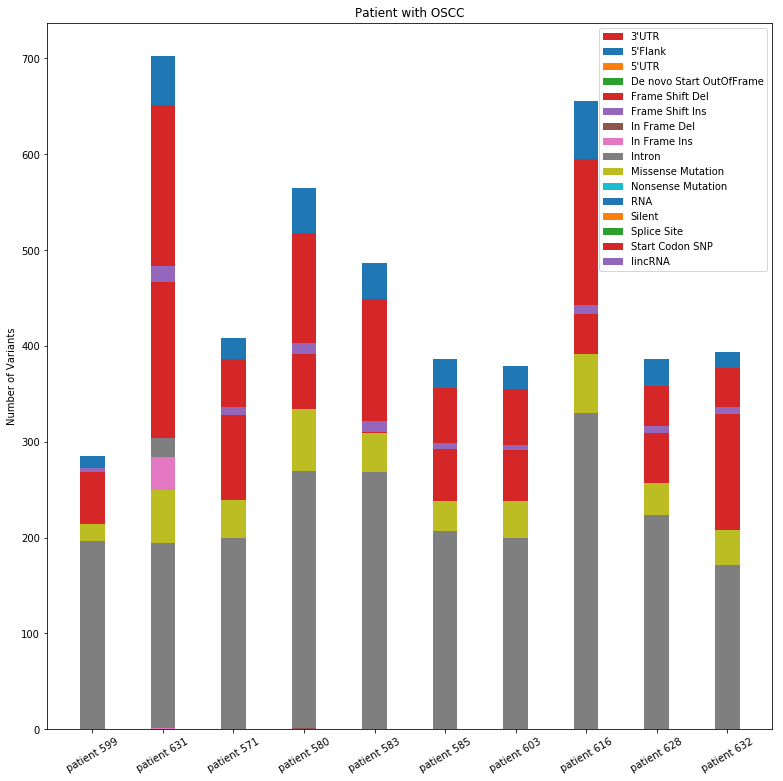

In [82]:
import numpy as np
import matplotlib.pyplot as plt

num_Intron=(); num_5_utr=(); num_3_utr=(); num_5_flank=(); num_Missense_Mutation=(); num_Nonsense_Mutation=(); num_Nonstop_Mutation=(); num_Silent=(); num_Splice_Site=(); num_In_Frame_Del=(); num_In_Frame_Ins=(); num_Frame_Shift_Ins=(); num_Frame_Shift_Del=(); num_Start_Codon_SNP=(); num_Start_Codon_Ins=(); num_Start_Codon_Del=(); num_De_novo_Start_InFrame=(); num_De_novo_Start_OutOfFrame=(); num_RNA=(); num_lincRNA=();
for pt in patient:
    pt_name = pt+'_'
    c_name = pt+'_count'
    count = count_1[count_1[c_name].notnull()]
    
    N = len(patient)
    num_Intron = num_Intron + (count[[c_name]][c_name]["Intron"], )
    num_5_utr = num_5_utr + (count[[c_name]][c_name]["5'UTR"], )
    num_3_utr = num_3_utr + (count[[c_name]][c_name]["3'UTR"], )
    num_5_flank = num_5_flank + (count[[c_name]][c_name]["5'Flank"], )
    num_Missense_Mutation = num_Missense_Mutation + (count[[c_name]][c_name]["Missense_Mutation"], )
    num_Nonsense_Mutation = num_Nonsense_Mutation + (count[[c_name]][c_name]["Nonsense_Mutation"], )
    num_Nonstop_Mutation = num_Nonstop_Mutation + (count[[c_name]][c_name]['Nonstop_Mutation'], )
    num_Silent = num_Silent + (count[[c_name]][c_name]["Silent"], )
    num_Splice_Site = num_Splice_Site + (count[[c_name]][c_name]["Splice_Site"], )
    num_In_Frame_Del = num_In_Frame_Del + (count[[c_name]][c_name]["In_Frame_Del"], )
    num_In_Frame_Ins = num_In_Frame_Ins + (count[[c_name]][c_name]["In_Frame_Ins"], )
    num_Frame_Shift_Ins = num_Frame_Shift_Ins + (count[[c_name]][c_name]["Frame_Shift_Ins"], )
    num_Frame_Shift_Del = num_Frame_Shift_Del + (count[[c_name]][c_name]["Frame_Shift_Del"], )
    num_Start_Codon_SNP = num_Start_Codon_SNP + (count[[c_name]][c_name]["Start_Codon_SNP"], )
    num_Start_Codon_Ins = num_Start_Codon_Ins + (count[[c_name]][c_name]['Start_Codon_Ins'], )
    num_Start_Codon_Del = num_Start_Codon_Del + (count[[c_name]][c_name]['Start_Codon_Del'], )
    num_De_novo_Start_InFrame = num_De_novo_Start_InFrame + (count[[c_name]][c_name]['De_novo_Start_InFrame'], )
    num_De_novo_Start_OutOfFrame = num_De_novo_Start_OutOfFrame + (count[[c_name]][c_name]["De_novo_Start_OutOfFrame"], )
    num_RNA = num_RNA + (count[[c_name]][c_name]["RNA"], )
    num_lincRNA = num_lincRNA + (count[[c_name]][c_name]["lincRNA"], )

plt.figure(figsize=(13,13))
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, num_Intron, width, color='#d62728')
p2 = plt.bar(ind, num_5_utr, width, bottom=num_Intron)
p3 = plt.bar(ind, num_3_utr, width, bottom=num_5_utr)
p4 = plt.bar(ind, num_5_flank, width, bottom=num_3_utr)
p5 = plt.bar(ind, num_Missense_Mutation, width, bottom=num_5_flank)
p6 = plt.bar(ind, num_Nonsense_Mutation, width, bottom=num_Missense_Mutation)
p7 = plt.bar(ind, num_Nonstop_Mutation, width, bottom=num_Nonsense_Mutation)
p8 = plt.bar(ind, num_Silent, width, bottom=num_Nonstop_Mutation)
p9 = plt.bar(ind, num_Splice_Site, width, bottom=num_Silent)
p10 = plt.bar(ind, num_In_Frame_Del, width, bottom=num_Splice_Site)
p11 = plt.bar(ind, num_In_Frame_Ins, width, bottom=num_In_Frame_Del)
p12 = plt.bar(ind, num_Frame_Shift_Ins, width, bottom=num_In_Frame_Ins)
p13 = plt.bar(ind, num_Frame_Shift_Del, width, bottom=num_Frame_Shift_Ins)
p14 = plt.bar(ind, num_Start_Codon_SNP, width, bottom=num_Frame_Shift_Del)
p15 = plt.bar(ind, num_Start_Codon_Ins, width, bottom=num_Start_Codon_SNP)
p16 = plt.bar(ind, num_Start_Codon_Del, width, bottom=num_Start_Codon_Ins)
p17 = plt.bar(ind, num_De_novo_Start_InFrame, width, bottom=num_Start_Codon_Del)
p18 = plt.bar(ind, num_De_novo_Start_OutOfFrame, width, bottom=num_De_novo_Start_InFrame)
p19 = plt.bar(ind, num_RNA, width, bottom=num_De_novo_Start_OutOfFrame)
p20 = plt.bar(ind, num_lincRNA, width, bottom=num_RNA)

x_labels = []
for i in patient:
    xtick_name = 'patient '+i
    x_labels.append(xtick_name)
#x_labels = ['patient 631']
plt.ylabel('Number of Variants')
plt.title('Patient with OSCC', )
plt.xticks(ind, x_labels, rotation=30)
plt.yticks(np.arange(0, 800, 100))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0], p11[0], p12[0], p13[0], p14[0], p15[0], p16[0], p17[0], p18[0], p19[0], p20[0]), ("3'UTR", "5'Flank", "5'UTR", "De novo Start OutOfFrame", "Frame Shift Del", "Frame Shift Ins", "In Frame Del", "In Frame Ins", "Intron", "Missense Mutation", "Nonsense Mutation", "RNA", "Silent", "Splice Site", "Start Codon SNP", "lincRNA"))

plt.show()

###### https://gatkforums.broadinstitute.org/gatk/discussion/8815/oncotator-variant-classification-and-secondary-variant-classification

###### "Intron" -- variant lies between exons within the bounds of the chosen transcript.
###### "5'UTR" -- variant is on the 5'UTR for the chosen transcript
###### "3'UTR" -- variant is on the 3'UTR for the chosen transcript
###### "IGR" -- intergenic region. Does not overlap any transcript.
###### "5'Flank" -- the variant is upstream of the chosen transcript (within 3kb)
###### "Missense_Mutation" -- the point mutation alters the protein structure by one amino acid. 
###### "Nonsense_Mutation" -- a premature stop codon is created by the variant. 
###### "Nonstop_Mutation" -- variant removes stop codon.
###### "Silent" -- variant is in coding region of the chosen transcript, but protein structure is identical. I.e. a synonymous mutation
###### "Splice_Site" -- the variant is within two bases of a splice site. See the secondary classification to determine if it lies on the exon or intron side.
###### "In_Frame_Del" -- deletion that keeps the sequence in frame
###### "In_Frame_Ins" -- insertion that keeps the sequence in frame
###### "Frame_Shift_Ins" -- insertion that moves the coding sequence out of frame 
###### "Frame_Shift_Del" -- deletion that moves the coding sequence out of frame 
###### "Start_Codon_SNP" -- point mutation that overlaps the start codon.
###### "Start_Codon_Ins" -- insertion that overlaps the start codon.
###### "Start_Codon_Del" -- seletion that overlaps the start codon.
###### "De_novo_Start_InFrame" -- New start codon is created by the given variant using the chosen transcript. However, it is in frame relative to the coded protein.
###### "De_novo_Start_OutOfFrame" -- New start codon is created by the given variant using the chosen transcript. However, it is out of frame relative to the coded protein.
###### "RNA" -- variant lies on one of the RNA transcripts.
###### "lincRNA" -- variant lies on one of the lincRNAs.